#### https://www.kaggle.com/datasets/arezaei81/heartcsv

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- cp: chest pain type (4 wartości)
- trestbps: spoczynkowe ciśnienie krwi
- chol: cholesterol
- fbs: cukier we krwi na czczo
- restecg: spoczynkowe EKG
- thalach: maksymalne tetno
- exang: duszność spowodowana wysiłkiem ('yes' = 1, 'no' = 0)

In [3]:
X = df[df.columns[:-1]]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [4]:
y_pred = tree.predict(X_test)

In [5]:
accuracy_score(y_test, y_pred)

0.7763157894736842

In [ ]:
x

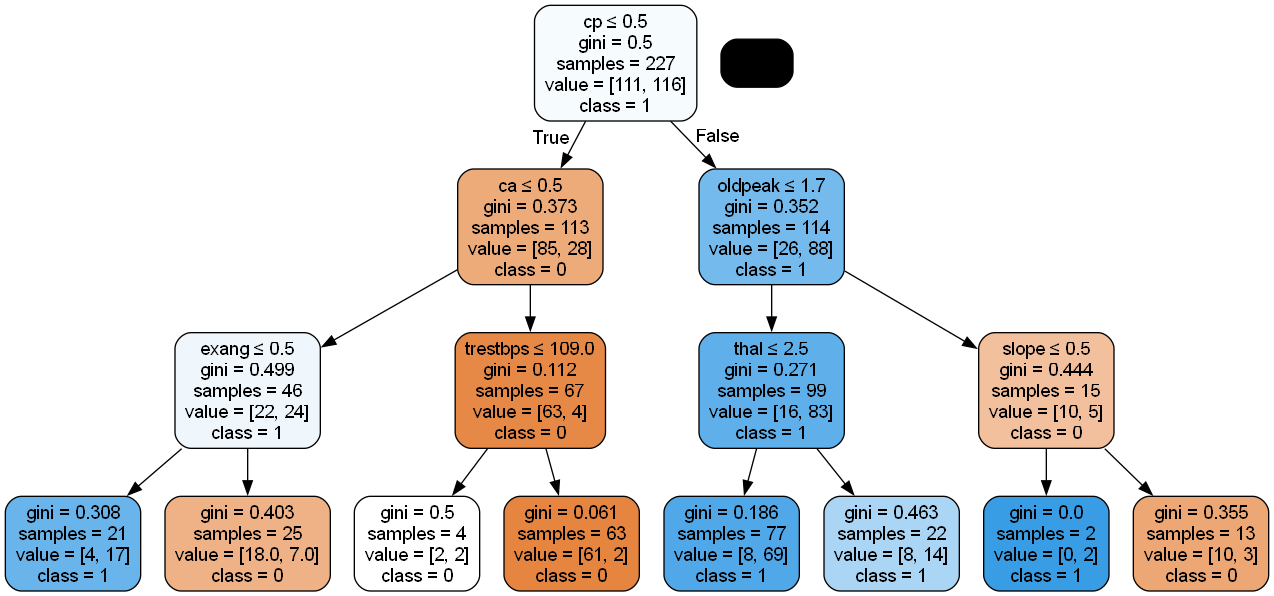

In [6]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=df.columns[:-1],
               class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())